<a href="https://colab.research.google.com/github/NyiShein/AAI2025/blob/main/Coding_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ----------------------------------------------------
# Load dataset
# Source: Kaggle Housing Prices Dataset (yasserh/housing-prices-dataset)
# ----------------------------------------------------
df = pd.read_csv("Housing.csv")   # replace with actual file name if different
print(df.head())  # quick preview of the first rows

# ----------------------------------------------------
# Define features (X) and target (y)
# We'll use 'area' (square footage) and 'furnishingstatus' (categorical)
# as predictors, and 'price' as the target variable.
# ----------------------------------------------------
X = df[['area', 'furnishingstatus']]
y = df['price']

# ----------------------------------------------------
# Preprocessing step:
# - OneHotEncode the categorical column 'furnishingstatus'
# - Leave 'area' (numerical) as is
# ----------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('furnishing', OneHotEncoder(sparse_output=False), ['furnishingstatus'])
    ],
    remainder='passthrough'  # keep 'area' column unchanged
)

# ----------------------------------------------------
# Create a pipeline:
# 1. Preprocess data (OneHotEncoder for furnishingstatus)
# 2. Train Linear Regression model
# ----------------------------------------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# ----------------------------------------------------
# Split the dataset into training and testing sets
# test_size=0.2 → 20% test data, 80% training data
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# ----------------------------------------------------
# Train the model on training data
# ----------------------------------------------------
model.fit(X_train, y_train)

# ----------------------------------------------------
# Make a prediction:
# Predict the price for a 2000 sq ft furnished house
# ----------------------------------------------------
new_house = pd.DataFrame({'area': [2000], 'furnishingstatus': ['furnished']})
predicted_price = model.predict(new_house)
print(f"Predicted price for a 2000 sq ft house with furnished status: ${predicted_price[0]:,.2f}")

# ----------------------------------------------------
# Display model coefficients:
# - Shows how much each feature (sq ft, furnishing type)
#   contributes to the predicted price.
# ----------------------------------------------------
feature_names = (
    model.named_steps['preprocessor']
    .named_transformers_['furnishing']
    .get_feature_names_out(['furnishingstatus'])
).tolist() + ['area']

coefficients = model.named_steps['regressor'].coef_

print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Predicted price for a 2000 sq ft house with furnished status: $3,995,195.37

Model Coefficients:
fu

**Part 2**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ----------------------------------------------------
# Sample dataset for churn prediction
# (In practice, replace with a larger real dataset)
# ----------------------------------------------------
data = {
    'age': [25, 34, 45, 28, 52, 36, 41, 29, 47, 33],
    'monthly_usage_hours': [10, 50, 20, 15, 60, 30, 25, 12, 55, 40],
    'purchase_amount': [100, 250, 150, 80, 300, 200, 175, 90, 280, 220],
    'customer_service_calls': [5, 2, 8, 6, 1, 3, 7, 4, 0, 2],
    'region': ['North', 'South', 'West', 'East', 'South', 'North', 'West', 'East', 'South', 'North'],
    'churn': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]  # 1 = churned, 0 = not churned
}
df = pd.DataFrame(data)

# ----------------------------------------------------
# Features (X) and Target (y)
# ----------------------------------------------------
X = df[['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls', 'region']]
y = df['churn']

# ----------------------------------------------------
# Preprocessing: scale numeric features + one-hot encode categorical
# ----------------------------------------------------
numeric_features = ['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls']
categorical_features = ['region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ]
)

# ----------------------------------------------------
# Create pipeline with preprocessing and Logistic Regression
# ----------------------------------------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# ----------------------------------------------------
# Train/test split and training
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# ----------------------------------------------------
# Predict churn probability for a new customer
# ----------------------------------------------------
new_customer = pd.DataFrame({
    'age': [35],
    'monthly_usage_hours': [20],
    'purchase_amount': [150],
    'customer_service_calls': [5],
    'region': ['West']
})

churn_probability = model.predict_proba(new_customer)[0][1]  # Probability of churn (class 1)
threshold = 0.5
churn_prediction = int(churn_probability > threshold)

print(f"Churn Probability for new customer: {churn_probability:.2f}")
print(f"Churn Prediction (1 = churn, 0 = no churn): {churn_prediction}")

# ----------------------------------------------------
# Show model coefficients to interpret feature impacts
# ----------------------------------------------------
ohe_feature_names = (
    model.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
).tolist()

feature_names = numeric_features + ohe_feature_names
coefficients = model.named_steps['classifier'].coef_[0]

print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

# Optional: check model accuracy
print("\nModel Accuracy on Test Data:", model.score(X_test, y_test))


Churn Probability for new customer: 0.82
Churn Prediction (1 = churn, 0 = no churn): 1

Model Coefficients:
age: -0.13
monthly_usage_hours: -0.62
purchase_amount: -0.67
customer_service_calls: 0.80
region_East: 0.17
region_North: -0.38
region_South: -0.03
region_West: 0.24

Model Accuracy on Test Data: 1.0


**Part 3**

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Sample dataset (toy example for segmentation)
# ----------------------------------------------------
data = {
    'annual_spending': [500, 1200, 300, 1500, 800, 200, 1000, 600, 1300, 400],
    'purchase_frequency': [5, 12, 3, 15, 8, 2, 10, 6, 13, 4],
    'age': [25, 34, 45, 28, 52, 36, 41, 29, 47, 33],
    'region': ['North', 'South', 'West', 'East', 'South', 'North', 'West', 'East', 'South', 'North']
}
df = pd.DataFrame(data)

# ----------------------------------------------------
# Preprocess: scale numerical features
# ----------------------------------------------------
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------
# Elbow Method to choose optimal K
# ----------------------------------------------------
inertia = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_plot.png')
plt.close()

# ----------------------------------------------------
# Apply KMeans with assumed optimal K=3
# ----------------------------------------------------
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# ----------------------------------------------------
# Analyze cluster characteristics
# ----------------------------------------------------
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)

# ----------------------------------------------------
# Suggested strategies based on clusters
# ----------------------------------------------------
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Strategy:")
    if cluster_summary.loc[cluster, 'annual_spending'] > 1000:
        print("High-spending customers: Offer exclusive promotions or loyalty rewards.")
    elif cluster_summary.loc[cluster, 'purchase_frequency'] > 10:
        print("Frequent buyers: Provide bulk discounts or subscription plans.")
    else:
        print("Low-engagement customers: Send personalized re-engagement campaigns.")

# ----------------------------------------------------
# Save cluster assignments to CSV
# ----------------------------------------------------
df.to_csv('customer_segments.csv', index=False)
print("\nCustomer segments saved to 'customer_segments.csv'")


Cluster Characteristics:
         annual_spending  purchase_frequency   age
cluster                                           
0                 1500.0               15.00  28.0
1                  400.0                4.00  33.6
2                 1075.0               10.75  43.5

Cluster 0 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Cluster 1 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.

Cluster 2 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Customer segments saved to 'customer_segments.csv'


**Extra Credit**

   month  sales
0      1    100
1      2    120
2      3    130
3      4    150
4      5    170


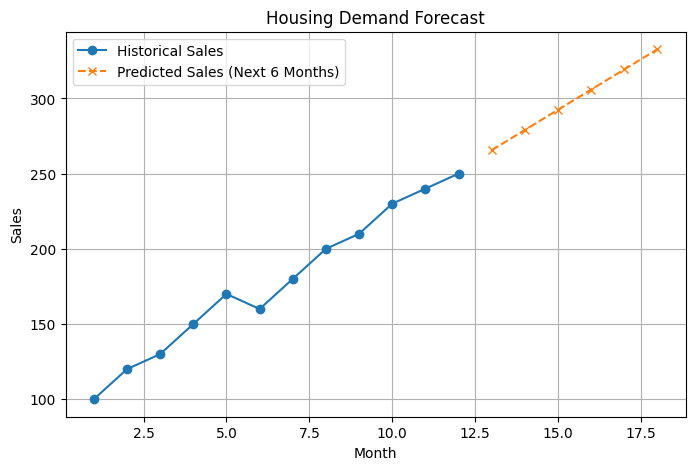


Forecast for next 6 months:
   month  predicted_sales
0     13           265.61
1     14           279.03
2     15           292.46
3     16           305.89
4     17           319.31
5     18           332.74


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Load dataset
# CSV must contain columns: 'month' (1,2,3,...) and 'sales'
# Example data source: custom sales_data.csv with monthly sales
# ----------------------------------------------------
df = pd.read_csv('sales_data.csv')
print(df.head())

# Features and target
X = df[['month']]
y = df['sales']

# ----------------------------------------------------
# Train regression model
# ----------------------------------------------------
model = LinearRegression()
model.fit(X, y)

# ----------------------------------------------------
# Forecast next 6 months
# ----------------------------------------------------
future_months = pd.DataFrame({'month': range(max(df['month'])+1, max(df['month'])+7)})
predictions = model.predict(future_months)

# ----------------------------------------------------
# Plot historical vs predicted
# ----------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(df['month'], y, label='Historical Sales', marker='o')
plt.plot(future_months['month'], predictions, label='Predicted Sales (Next 6 Months)', linestyle='--', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Housing Demand Forecast')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------------
# Print predictions for next 6 months
# ----------------------------------------------------
forecast_df = future_months.copy()
forecast_df['predicted_sales'] = predictions.round(2)
print("\nForecast for next 6 months:")
print(forecast_df)
